In [1]:
# connecting to drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install patool


     |████████████████████████████████| 81kB 3.9MB/s 


In [1]:
# importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [4]:
import patoolib

patoolib.extract_archive('/content/drive/My Drive/X-ray.rar', outdir="/")





patool: Extracting /content/drive/My Drive/X-ray.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/X-ray.rar"
patool:     with cwd='/'
patool: ... /content/drive/My Drive/X-ray.rar extracted to `/'.


'/'

In [6]:
import os
covid_dir = os.path.join('/X-ray/COVID')
normal_dir = os.path.join('/X-ray/NORMAL')
pneumonia_dir = os.path.join('/X-ray/PNEUMONIA')

print('total training covid images:', len(os.listdir(covid_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))
print('total training pneumonia images:', len(os.listdir(pneumonia_dir)))

rock_files = os.listdir(covid_dir)
print(rock_files[:10])

paper_files = os.listdir(normal_dir)
print(paper_files[:10])

scissors_files = os.listdir(pneumonia_dir)
print(scissors_files[:10])

total training covid images: 4044
total training normal images: 3941
total training pneumonia images: 4273
['aug_31BA3780-2323-493F-8AED-62081B9C383B._PL_4.jpg', 'person1612_virus_2797.jpeg', '90070cbc.jpg', 'person491_virus_997.jpeg', '046.jpeg', 'person1504_virus_2614.jpeg', 'COVID-19 (103).png', 'AR-1.jpg', 'person441_virus_895.jpeg', 'aug_F63AB6CE-1968-4154-A70F-913AF154F53D._avg_1.jpg']
['00002032_006.png', '00003097_003.png', 'NORMAL2-IM-1150-0001.jpeg', '00003248_001.png', 'NORMAL2-IM-0525-0001.jpeg', 'Non-COVID-19 (76).jpg', 'Non-COVID-19 (236).jpeg', 'Non-COVID-19 (182).jpg', '00002860_002.png', 'NORMAL2-IM-0836-0001.jpeg']
['person1439_bacteria_3722.jpeg', 'person1612_virus_2797.jpeg', 'person139_bacteria_663.jpeg', 'person491_virus_997.jpeg', 'person1504_virus_2614.jpeg', 'person441_virus_895.jpeg', 'person51_bacteria_244.jpeg', 'person1030_virus_1722.jpeg', 'person1040_virus_1735.jpeg', 'person514_virus_1031.jpeg']


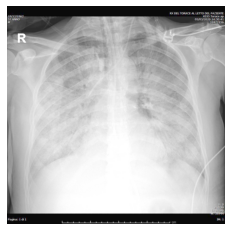

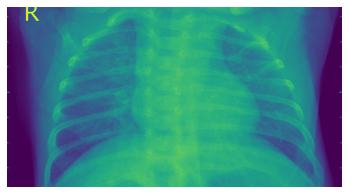

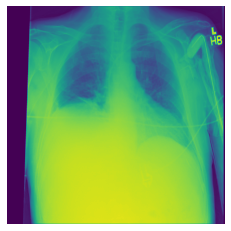

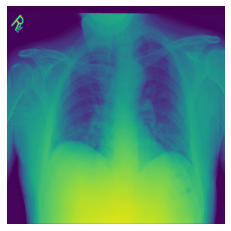

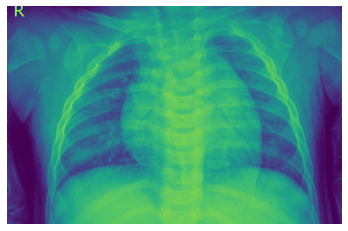

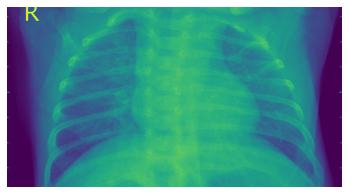

In [7]:
%matplotlib inline
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(covid_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
                
next_paper = [os.path.join(normal_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(pneumonia_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
# Loading the data from the directory of train and test

TRAINING_DIR = '/X-ray/' 
train_datagen = ImageDataGenerator( rescale=1.0/255 ) 


# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
                                              TRAINING_DIR , target_size=(224, 224),  
                                              batch_size=126,
                                              class_mode='categorical') 



VALIDATION_DIR = "/content/drive/My Drive/datasets/train/"
validation_datagen = ImageDataGenerator(rescale = 1./255)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)



TEST_DIR = '/content/drive/My Drive/datasets/test/' 
test_datagen = ImageDataGenerator( rescale=1.0/255 ) 


# TEST GENERATOR.
test_generator = test_datagen.flow_from_directory(
                                              TEST_DIR , target_size=(224, 224),
                                              class_mode='categorical') 

Found 12251 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 326 images belonging to 3 classes.


folder= pnuemenia


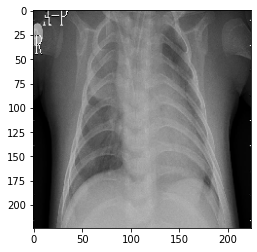

folder= normal


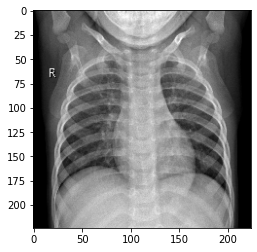

folder= covid


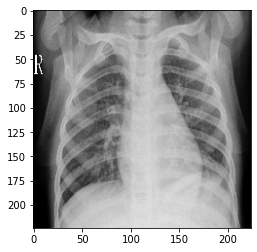

folder= covid


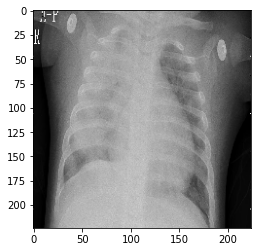

folder= pnuemenia


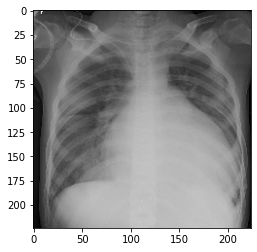

folder= covid


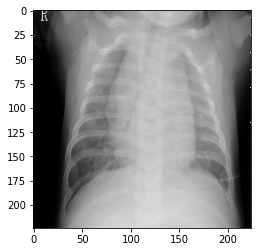

folder= normal


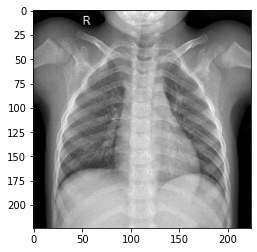

folder= covid


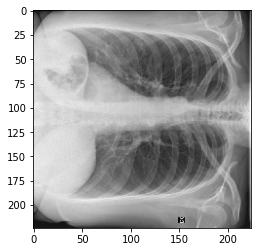

folder= covid


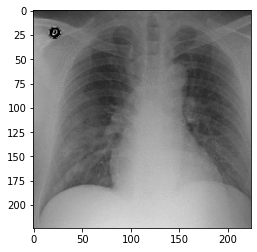

folder= normal


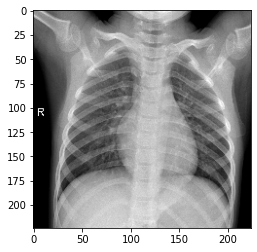

In [10]:
# to visualize the data in the generators

x_batch, y_batch = next(train_generator) 
for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)

    if y_batch[i][0] == 1: print('folder= covid')
    elif y_batch[i][1] == 1: print('folder= normal')
    elif y_batch[i][2] == 1: print('folder= pnuemenia')
    plt.show()

In [11]:

from tensorflow.keras.applications.vgg19 import VGG19
pre_trained_model = VGG19(input_shape = (224, 224 , 3), include_top = False , pooling='avg' , weights = 'imagenet' )
pre_trained_model.trainable = False


80142336/80134624 [==============================] - 1s 0us/step


In [12]:
model=tf.keras.Sequential([
                           pre_trained_model,
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.Dense(3,  activation='softmax')
])

#opt=tf.keras.optimizers.RMSprop( 0.001 , momentum=0.9)
#opt=tf.keras.optimizers.SGD( 0.001,0.9 )
model.compile(optimizer='adam' , loss = 'categorical_crossentropy',  metrics = ['accuracy'] )

model.summary()
cb=tf.keras.callbacks.ModelCheckpoint(
                                      f'checkpoint_test' , monitor='val_loss', verbose=0, save_best_only=True,
                                      save_weights_only=False, mode='auto', save_freq='epoch' )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 1028)              527364    
_________________________________________________________________
dropout (Dropout)            (None, 1028)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1028)              4112      
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1028)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1028)              4

In [13]:
history = model.fit(train_generator, validation_data= validation_generator ,
                    epochs = 25, shuffle=True, workers=-1,
                    verbose = 1,callbacks=cb)
'''history = model.fit(
              x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
                  sample_weight=None, initial_epoch=0, steps_per_epoch=None,
                  validation_steps=None, validation_batch_size=None, validation_freq=1,
                  max_queue_size=10, workers=1, use_multiprocessing=False )'''

Epoch 1/25
98/98 [==============================] - ETA: 0s - loss: 1.0326 - accuracy: 0.6053WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoint_test/assets
98/98 [==============================] - 309s 3s/step - loss: 1.0326 - accuracy: 0.6053 - val_loss: 0.9120 - val_accuracy: 0.6259
Epoch 2/25
98/98 [==============================] - 220s 2s/step - loss: 0.7843 - accuracy: 0.6704 - val_loss: 1.1063 - val_accuracy: 0.3963
Epoch 3/25
98/98 [==============================] - 221s 2s/step - loss: 0.7073 - accuracy: 0.7033 - val_loss: 0.7621 - val_accuracy: 0.7148
Epoch 4/25
98/98 [==============================] - 220s 2s/step - loss: 0.6701 

'history = model.fit(\n              x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,\n                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,\n                  sample_weight=None, initial_epoch=0, steps_per_epoch=None,\n                  validation_steps=None, validation_batch_size=None, validation_freq=1,\n                  max_queue_size=10, workers=1, use_multiprocessing=False )'

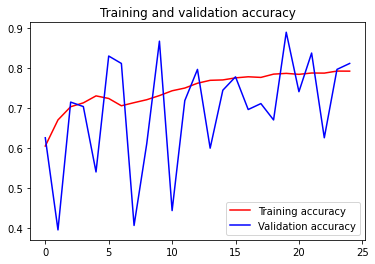

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
export_dir='model_VGG_Adam.ipynb'
tf.saved_model.save( model , export_dir)

INFO:tensorflow:Assets written to: model_VGG_Adam.ipynb/assets


In [17]:
!zip -r model_VGG_Adam.zip 'model_VGG_Adam.ipynb'
#Download files
from google.colab import files 
files.download('model_VGG_Adam.zip')

  adding: model_VGG_Adam.ipynb/ (stored 0%)
  adding: model_VGG_Adam.ipynb/saved_model.pb (deflated 91%)
  adding: model_VGG_Adam.ipynb/variables/ (stored 0%)
  adding: model_VGG_Adam.ipynb/variables/variables.data-00000-of-00002 (deflated 82%)
  adding: model_VGG_Adam.ipynb/variables/variables.data-00001-of-00002 (deflated 9%)
  adding: model_VGG_Adam.ipynb/variables/variables.index (deflated 71%)
  adding: model_VGG_Adam.ipynb/assets/ (stored 0%)


NameError: ignored

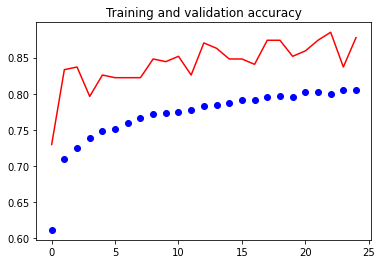

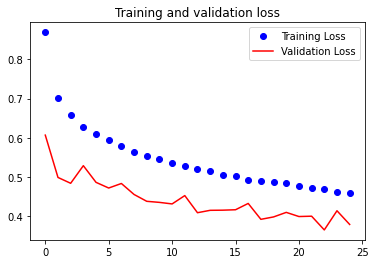

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
history=tf.keras.models.load_model('model_VGG_Adam')
history.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                multiple                  20024384  
_________________________________________________________________
dense (Dense)                multiple                  527364    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4112      
_________________________________________________________________
dense_1 (Dense)              multiple                  1057812   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  4

Found 10 images belonging to 4 classes.
prediction = Normal
folder= covid


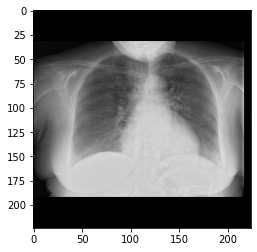

prediction = Covid
folder= covid


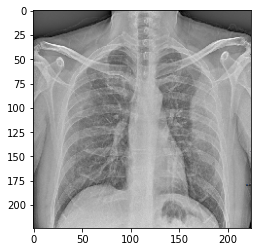

prediction = Covid
folder= covid


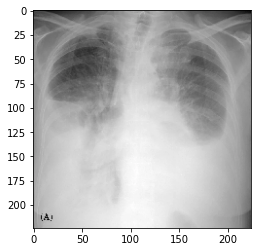

prediction = Normal
folder= normal


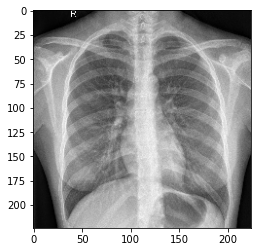

prediction = Normal
folder= normal


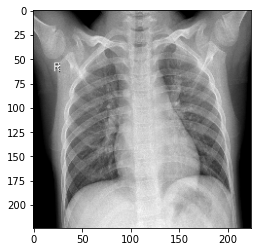

prediction = Pnumenia
folder= normal


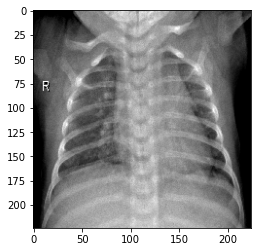

prediction = Covid
folder= Nawwar


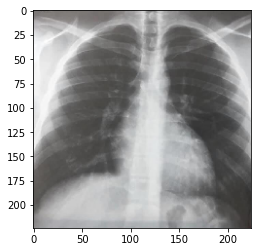

prediction = Pnumenia
folder= pnuemenia


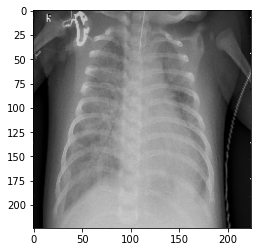

prediction = Pnumenia
folder= pnuemenia


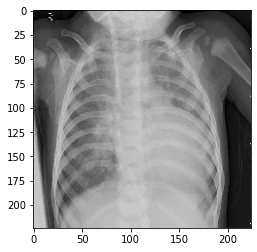

prediction = Pnumenia
folder= pnuemenia


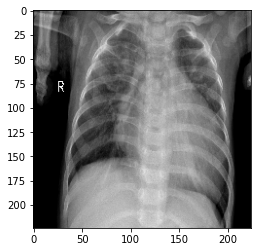

['Normal',
 'Covid',
 'Covid',
 'Normal',
 'Normal',
 'Pnumenia',
 'Covid',
 'Pnumenia',
 'Pnumenia',
 'Pnumenia']

In [7]:
# making predictions on images the model was not trained on

test = '../test_images/' # directory of test images

test_datagen = ImageDataGenerator( rescale=1.0/255 )  # preparing the test data as we done with train and valdiation

test_generator = test_datagen.flow_from_directory(
                                              test , target_size=(224, 224),
                                              class_mode='categorical',shuffle=False)  
# to visualize the data in the generators
labels={0:'Covid' , 1:'Normal' , 2:'Pnumenia'}
# then feed the variable images into the predict func.
predicted_label = np.argmax(history.predict( test_generator ),axis=1)
pred= [labels[x] for x in predicted_label]

x_batch, y_batch = next(test_generator) 
for i in range (len(pred)):
    image = x_batch[i]
    plt.imshow(image)
    print('prediction =', pred[i])
    if y_batch[i][0] == 1: print('folder= covid')
    elif y_batch[i][1] == 1: print('folder= normal')
    #elif y_batch[i][2] == 1: print('folder= Nawwar')
    elif y_batch[i][2] == 1: print('folder= pnuemenia')
    plt.show()

     
    
